In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
from ngd import*
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

2022-06-16 16:57:51.650808: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-16 16:57:51.650842: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
y_train = y_train.flatten()
y_test = y_test.flatten()

/home/ruslan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[[Text(0, 0, 'airplane'),
  Text(1, 0, 'automobile'),
  Text(2, 0, 'bird'),
  Text(3, 0, 'cat'),
  Text(4, 0, 'deer'),
  Text(5, 0, 'dog'),
  Text(6, 0, 'frog'),
  Text(7, 0, 'horse'),
  Text(8, 0, 'ship'),
  Text(9, 0, 'truck')]]

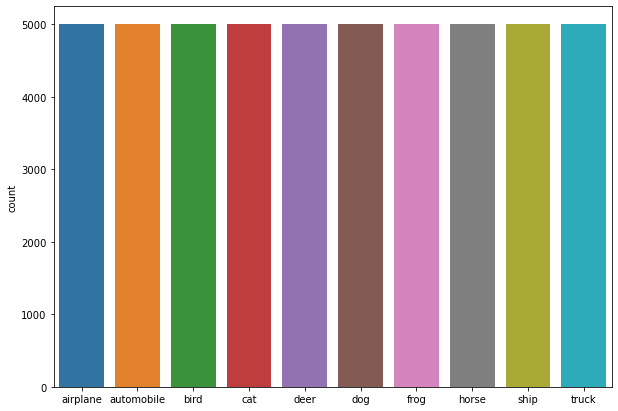

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=classes)

In [5]:
np.isnan(x_train).any()
np.isnan(x_test).any()

False

In [6]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

2022-06-16 16:58:01.528852: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-16 16:58:01.529505: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-16 16:58:01.529538: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ruslan-Inspiron-5770): /proc/driver/nvidia/version does not exist
2022-06-16 16:58:01.539093: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
batch_size = 32
num_classes = 10
epochs = 16

In [8]:
model = Sequential([
    Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

In [9]:
opt = NGD_Dirichlet(learning_rate = 0.004, momentum = 0.94,nesterov = True)
model.compile(optimizer=opt,
            loss='categorical_crossentropy', metrics=['acc'])

In [10]:
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data = (x_test, y_test))

2022-06-16 16:58:03.421535: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/16
   3/1563 [..............................] - ETA: 1:41 - loss: 2.2919 - acc: 0.1354

2022-06-16 16:58:05.586924: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21415680 exceeds 10% of free system memory.
2022-06-16 16:58:05.590504: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 21415680 exceeds 10% of free system memory.
2022-06-16 16:58:05.596177: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 20995200 exceeds 10% of free system memory.
2022-06-16 16:58:05.596744: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 20995200 exceeds 10% of free system memory.


1563/1563 [==============================] - 97s 61ms/step - loss: 1.7712 - acc: 0.3462 - val_loss: 1.3557 - val_acc: 0.5094
Epoch 2/16
1563/1563 [==============================] - 97s 62ms/step - loss: 1.3361 - acc: 0.5172 - val_loss: 1.1636 - val_acc: 0.5857
Epoch 3/16
1563/1563 [==============================] - 98s 62ms/step - loss: 1.1586 - acc: 0.5861 - val_loss: 0.9998 - val_acc: 0.6503
Epoch 4/16
1563/1563 [==============================] - 94s 60ms/step - loss: 1.0350 - acc: 0.6330 - val_loss: 0.9186 - val_acc: 0.6776
Epoch 5/16
1563/1563 [==============================] - 96s 61ms/step - loss: 0.9501 - acc: 0.6660 - val_loss: 0.8367 - val_acc: 0.7049
Epoch 6/16
1563/1563 [==============================] - 98s 63ms/step - loss: 0.8810 - acc: 0.6906 - val_loss: 0.7931 - val_acc: 0.7227
Epoch 7/16
1563/1563 [==============================] - 97s 62ms/step - loss: 0.8243 - acc: 0.7095 - val_loss: 0.7727 - val_acc: 0.7302
Epoch 8/16
1563/1563 [==============================] - 96s

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.6338 - acc: 0.7849
